<a href="https://colab.research.google.com/github/oksusudom/ML-Creadit-Card-Lead-Prediction/blob/main/AI_10_%EC%9D%B4%EC%88%98%EC%B2%A0_CP1_Section2_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section2 Project#


##데이터 선정 이유 및 문제 정의
---


####데이터 선정 이유####
- 은행 및 카드사는 고객 맞춤 상품을 기획/서비스하기 위해 고객의 정보나 결제내역 등을 분석하여 고객들을 세분화하고 있다.

- 프로젝트에 쓰인 데이터는 고객 정보(객들의 나이, 직업, 지역, 가입기간, 평균 계좌 잔액, 대출 및 신용 상품 이용 등 인구통계학적, 행동적 특성)들로 구성되어 있다. 분석을 통해 고객을 분류하면 특정 고객에 맞는 서비스를 제공하여 비용 절감, 충성 고객 증가, 상품 기획 방향 제시 등의 장점이 있을 것으로 기대된다.

####문제 정의####
- 이 데이터를 통해 은행 기존 고객 중 recommended credit card 판매 제안을 수락할 가능성이 있는 고객을 예측하는 이진 분류 모델로 접근하려고 한다.  



## 가설 및 평가지표, Baseline 설정


---



평가지표
-   Target 특성은 'Is_Lead'로 설정되어 있는 dataset이다.
-   Train Dataset에서 'Is_Lead'가 '1'인 (판매 제안을 수락할 가능성이 있는)고객의 데이터를 통해, Test Dataset의 고객 데이터에서 'Is_Lead'를 예측한다.
-   해당 데이터는 imbalanced class를 가지고 있기 때문에 f1 score나 roc-auc curve를 평가지표로 사용한다.

가설 세우기
-   가설1 : 'Age'가 30~60 사이의 고객이 신용카드를 발급받을 가능성이 유의미하게 높을 것이다.
-   가설2 : 고객의 'Vintage'의 값은 카드를 발급받을 가능성과 비례할 것이다.
-   가설3 : 'Credit_Product'를 이용하는 고객과 아닌 고객의 카드 발급 가능성이 유의미하게 차이가 난다.
-   가설4 : 'Avg_Account_Balance'가 적은 고객이 카드를 발급받을 가능성에서 유의미하게 차이가 난다. 
-   가설5 :특정 'Occupation'이 카드를 발급받을 가능성이 유의미하게 높을 것이다.

Baseline 설정
-   이진 분류 문제이기 때문에 Target의 최빈값을 기준 모델로 세운다.



---

## EDA, PREPROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U matplotlib
#!pip install pdpbox
#!pip install shap
#!pip install category_encoders
#!pip install eli5
#!pip install xgboost
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# dataset load

df = pd.read_csv('/content/drive/MyDrive/URCLASS/Section2_Project/credit card/train.csv')

---
Dataset Detail






*   ID : Unique Identifier for a row
*   Gender : Gender of the Customer
*   Age : Age of the Customer (in Years)
*   Region_Code : Code of the Region for the customers
*   Occupation : Occupation Type for the customer
*   Channel_Code : Acquisition Channel Code for the Customer (Encoded)
*   Vintage : Vintage for the Customer (In Months)
*   Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)
*   Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months
*   Is_Active : If the Customer is Active in last 3 Months
*   Is_Lead : If the Customer is interested for the Credit Card [0 : Customer is not interested], [1 : Customer is interested]

---

In [ ]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# 중복 확인 : 중복 없음
#df.duplicated().value_counts()

In [ ]:
# 결측치 확인
df.isna().sum()

# Credit_Product 에 많은 결측치가 있는 것을 확인.

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
# Credit_Product 결측치 확인
df.loc[df['Credit_Product'].isna()]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1
40,6WX9JDVK,Female,63,RG254,Other,X3,103,NaN,1249319,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
245684,WVJFPREY,Female,51,RG281,Entrepreneur,X3,99,NaN,552992,No,1
245694,WIZBXYQZ,Female,50,RG277,Self_Employed,X2,92,NaN,1385124,No,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
245714,KSCFGXV3,Female,46,RG268,Self_Employed,X2,19,NaN,993195,No,1


In [ ]:
# 130862 행은 5개의 특성이 결측치이므로 삭제.
df = df.drop(130862)
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
#import pandas_profiling
#profiling_report = df.profile_report()

#profiling_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

*   df 의 Credit_Product 특성의 결측치가 10% 이상이다.
*   Credit_Product 특성이 다른 특성에 영향을 주는지 확인 후 처리

### Target 확인

In [ ]:
df['Is_Lead'].value_counts(normalize=True)

0    0.762795
1    0.237205
Name: Is_Lead, dtype: float64

Target 최빈값 정확도 0.762795

In [ ]:
# imbalanced class 가중치

ratio = 0.762795 / 0.237205

ratio

3.215762736873169

In [ ]:
# visualization options
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.style'] = 'normal'
background = '#F8F8F8'#f5fffa'#'#efeeee'#
palette =  sns.color_palette('BrBG_r', 20)
sns.set_context('poster', font_scale=0.8)

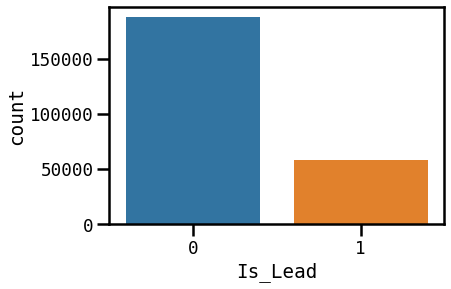

In [ ]:
sns.countplot(x = df['Is_Lead']);
plt.show() # imbalanced 확인



*   Target class가 불균형하기 때문에 f1 score나 roc_auc score로 모델의 성능 측정



##가설 검증

-   가설1 : 'Age'가 30~60 사이의 고객이 신용카드를 발급받을 가능성이 유의미하게 높을 것이다.
-   가설2 : 고객의 'Vintage'의 값은 카드를 발급받을 가능성과 비례할 것이다.
-   가설3 : 'Credit_Product'를 이용하는 고객과 아닌 고객의 카드 발급 가능성이 유의미하게 차이가 난다.
-   가설4 : 'Avg_Account_Balance'가 적은 고객이 카드를 발급받을 가능성에서 유의미하게 차이가 난다. 
-   가설5 :특정 'Occupation'이 카드를 발급받을 가능성이 유의미하게 높을 것이다.

In [ ]:
# Is_Lead가 0인 그룹과 1인 그룹을 각각 dataFrame으로 저장

# 전체 고객 중 판매 제안을 수락할 가능성이 없는 고객 187,437명
non_target_customers = df[df['Is_Lead'] == 0]
non_target_customers 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
# 전체 고객 중 판매 제안을 수락할 가능성이 있는 고객 58,297명
target_customers = df[df['Is_Lead'] == 1]
target_customers

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1
...,...,...,...,...,...,...,...,...,...,...,...
245697,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1
245713,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1


가설 1. Age가 30~60 사이의 고객이 발급받을 가능성이 높다.

In [ ]:
# 30세 이상 고객 중 판매 제안을 수락할 가능성이 있는 고객 54,291명
age_30_to_60 = df[(df['Age'] >= 30) & (df['Age'] <= 60) & (df['Is_Lead'] == 1)]
age_30_to_60

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1
29,KGLLM5AM,Female,52,RG283,Self_Employed,X3,56,Yes,1056910,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
245697,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1
245713,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1


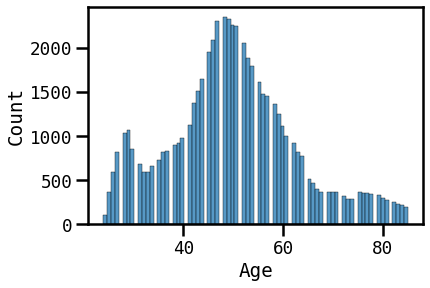

In [ ]:
#### 전체 분포 퍼센트 그래프  나이별로 Is_Lead가 1인 비율
#### 각 나이별로 Is_Lead인 비율 count 아니고

df['Lead_percent'] = round
sns.histplot(target_customers['Age']);

In [ ]:
v = df.groupby('Age').Is_Lead.value_counts().unstack()

In [ ]:
v

Is_Lead,0,1
Age,,
23,1.0,NaN
24,1794.0,111.0
25,4940.0,367.0
26,8448.0,591.0
27,12183.0,822.0
...,...,...
81,559.0,271.0
82,494.0,255.0
83,466.0,228.0


In [ ]:
v['Ratio'] = v[1]/(v[0] + v[1])
v['Ratio']

Age
23         NaN
24    0.058268
25    0.069154
26    0.065383
27    0.063206
        ...   
81    0.326506
82    0.340454
83    0.328530
84    0.342949
85    0.332781
Name: Ratio, Length: 63, dtype: float64

In [ ]:
v.reset_index(inplace=True)

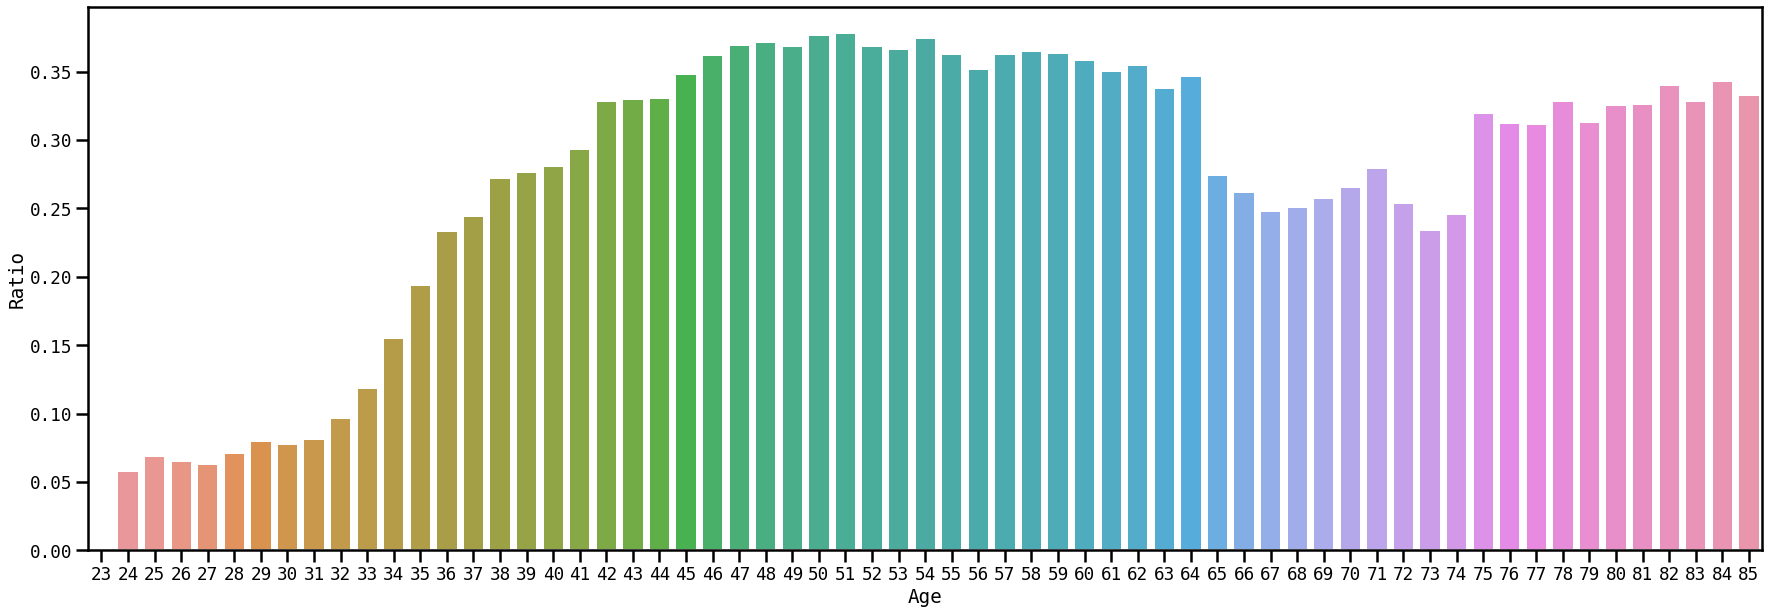

In [ ]:
ax = plt.subplots(figsize=(30, 10))
sns.set_style("whitegrid")
sns.barplot(x='Age', y='Ratio', data=v.sort_values(by=['Ratio'], ascending=False));



*   가장 비율이 높은 나이대는 40대 중반부터 60대 중반까지, 그 다음으로 70, 80대가 높았다.


가설 2. Vintage가 높은 고객이 카드를 발급받을 가능성이 높다.

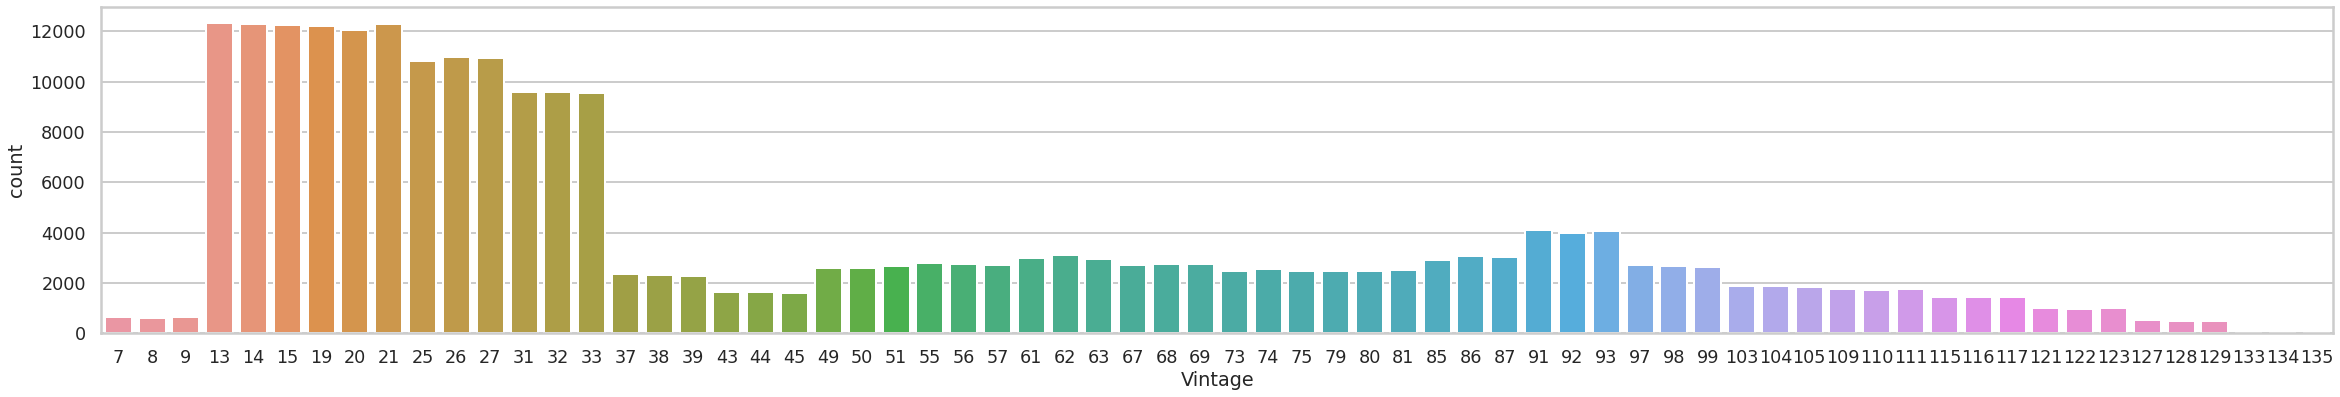

In [ ]:
# Vintage의 분포는 13 ~ 33이 가장 많음.


plt.figure(figsize = (40,6))
sns.countplot(x= df['Vintage']);

### 비율로 plot 다시 그리기 Is_Lead가 0인 것과 1인 것을 데이터 프레임 나누기  비율 그래프

In [ ]:
vintage = df.groupby('Vintage').Is_Lead.value_counts().unstack()
vintage

Is_Lead,0,1
Vintage,,
7,501,147
8,484,135
9,490,148
13,10499,1839
14,10463,1804
...,...,...
128,313,188
129,336,163
133,15,3


In [ ]:
vintage['Ratio'] = vintage[1]/(vintage[0] + vintage[1])
vintage['Ratio']

Vintage
7      0.226852
8      0.218094
9      0.231975
13     0.149052
14     0.147061
         ...   
128    0.375250
129    0.326653
133    0.166667
134    0.428571
135    0.210526
Name: Ratio, Length: 66, dtype: float64

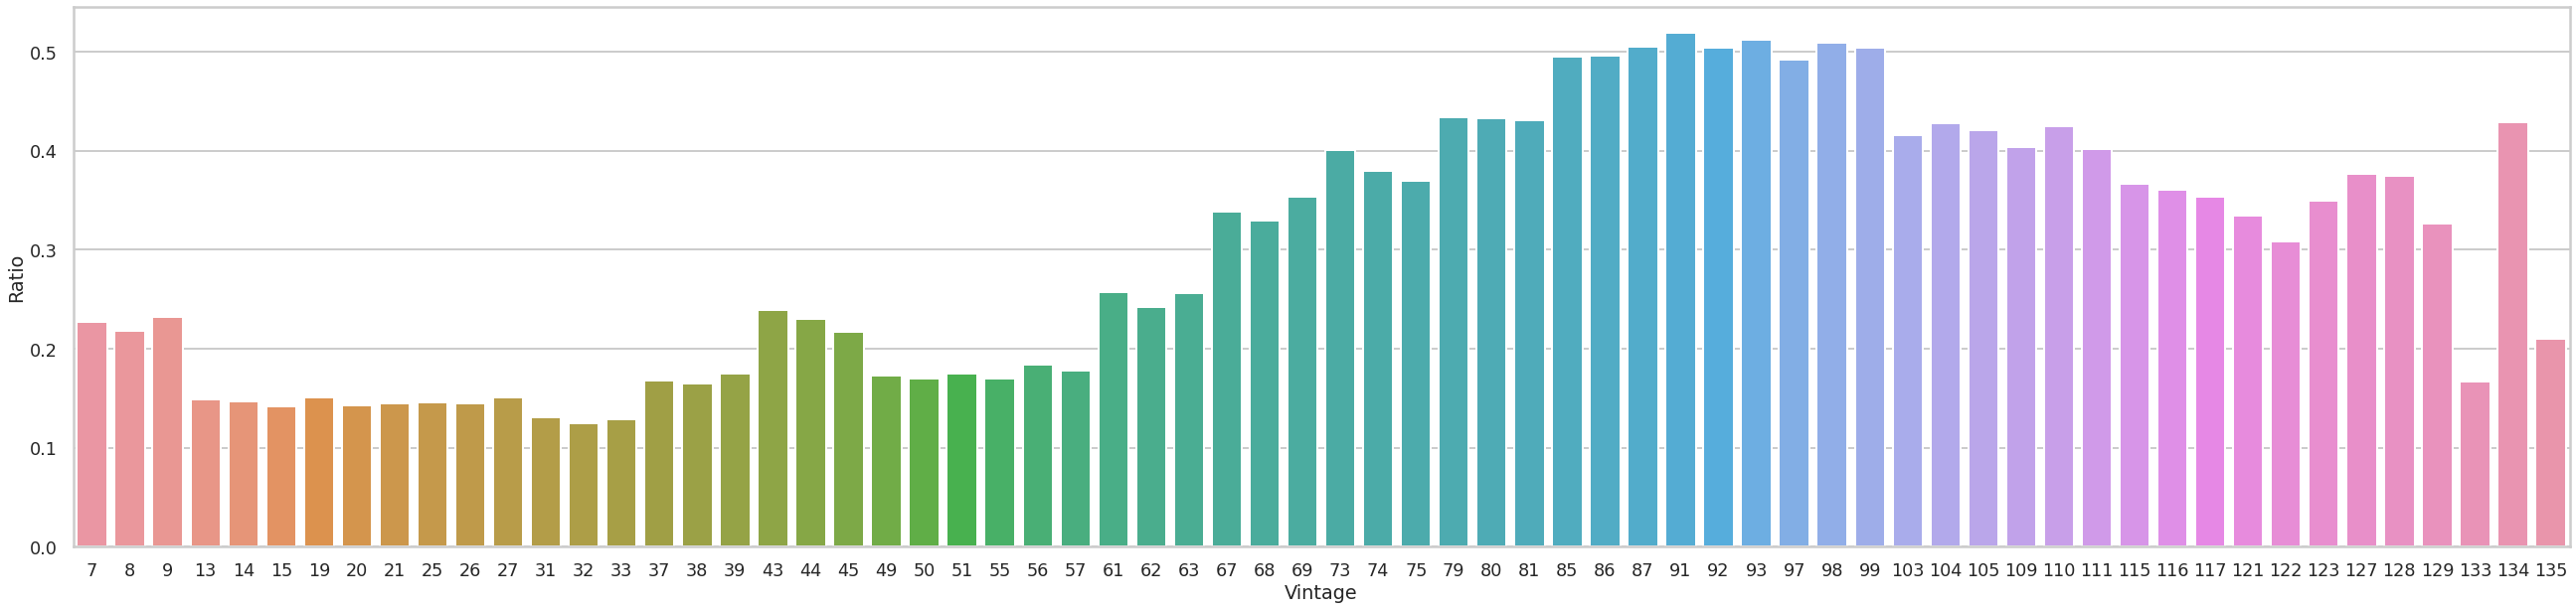

In [ ]:
vintage.reset_index(inplace=True)

ax = plt.subplots(figsize=(45, 10))
sns.set_style("whitegrid")
sns.barplot(x='Vintage', y='Ratio', data=vintage.sort_values(by=['Ratio'], ascending=False));

In [ ]:
# Vintage가 33 보다 큰 고객(3년 이상된 고객)이 목표 고객(판매 제안을 수락할 가능성이 있는)비중이 컸다.
vintage_over_3years = df[(df['Vintage'] > 33) & (df['Is_Lead'] == 1)]
vintage_over_3years

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1,<built-in function round>
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1,<built-in function round>
29,KGLLM5AM,Female,52,RG283,Self_Employed,X3,56,Yes,1056910,Yes,1,<built-in function round>
34,FXPTJYP7,Male,67,RG268,Other,X1,87,Yes,1684182,No,1,<built-in function round>
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245684,WVJFPREY,Female,51,RG281,Entrepreneur,X3,99,NaN,552992,No,1,<built-in function round>
245690,3HPHK52G,Male,51,RG283,Self_Employed,X1,91,No,766548,No,1,<built-in function round>
245693,NUTSCAQY,Female,52,RG273,Other,X3,74,Yes,1122023,Yes,1,<built-in function round>
245694,WIZBXYQZ,Female,50,RG277,Self_Employed,X2,92,NaN,1385124,No,1,<built-in function round>


In [ ]:
# Vintage가 33 작거나 같은 고객(3년 이하 고객)이 목표 고객(판매 제안을 수락할 가능성이 있는)비중이 적었다.
vintage_less_3years = df[(df['Vintage'] <= 33) & (df['Is_Lead'] == 1)]
vintage_less_3years

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1,<built-in function round>
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1,<built-in function round>
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1,<built-in function round>
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1,<built-in function round>
60,BHQ57HGE,Male,36,RG254,Self_Employed,X2,15,NaN,584792,No,1,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245683,9VFKEFOS,Male,71,RG283,Other,X3,13,NaN,492873,No,1,<built-in function round>
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1,<built-in function round>
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1,<built-in function round>
245713,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1,<built-in function round>




*   Vintage가 높을 수록 목표 고객일 가능성이 높음.



가설3. Credit_Product를 이용하는 고객이 카드를 발급받을 가능성이 높다.

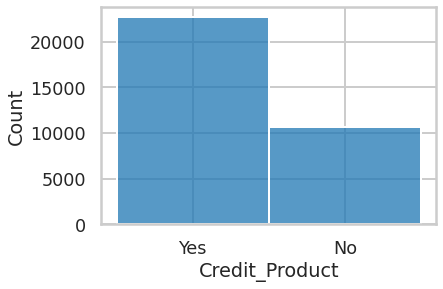

In [ ]:
#### p-value 상관계수로 나타내기, Yes / NO 로 3가지를 표로 


sns.histplot(target_customers['Credit_Product']);

In [ ]:
# credit product를 이용하는 고객 중 목표 고객 22,690명
credit_product_use = df[(df['Credit_Product'] == 'Yes') & (df['Is_Lead'] == 1)]
credit_product_use

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1,<built-in function round>
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1,<built-in function round>
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1,<built-in function round>
29,KGLLM5AM,Female,52,RG283,Self_Employed,X3,56,Yes,1056910,Yes,1,<built-in function round>
34,FXPTJYP7,Male,67,RG268,Other,X1,87,Yes,1684182,No,1,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245669,T7JQRU72,Female,26,RG259,Salaried,X1,20,Yes,501265,No,1,<built-in function round>
245670,FLW3ERJ4,Male,53,RG277,Self_Employed,X3,69,Yes,422705,Yes,1,<built-in function round>
245693,NUTSCAQY,Female,52,RG273,Other,X3,74,Yes,1122023,Yes,1,<built-in function round>
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1,<built-in function round>


In [ ]:
# credit product를 이용하는 고객 중 목표가 아닌 고객 
credit_product_use_not_Lead = df[(df['Credit_Product'] == 'Yes') & (df['Is_Lead'] == 0)]
credit_product_use_not_Lead

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0,<built-in function round>
11,GZ5TMYIR,Male,27,RG270,Self_Employed,X1,14,Yes,502787,No,0,<built-in function round>
13,KCE7JSFN,Male,31,RG254,Salaried,X1,31,Yes,938754,No,0,<built-in function round>
33,PQXUNUBE,Male,27,RG279,Salaried,X1,21,Yes,312158,No,0,<built-in function round>
39,87RGCC5J,Female,48,RG283,Self_Employed,X1,26,Yes,1343268,Yes,0,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245698,6M3TP9FC,Male,51,RG252,Other,X3,15,Yes,670793,No,0,<built-in function round>
245700,HYLMMYPG,Female,38,RG268,Self_Employed,X2,63,Yes,1184527,Yes,0,<built-in function round>
245701,BG6UHJTS,Male,32,RG277,Salaried,X1,13,Yes,9491986,No,0,<built-in function round>
245704,X9YX9RDO,Male,49,RG268,Self_Employed,X2,21,Yes,833609,No,0,<built-in function round>


In [ ]:
# credit product를 이용하지 않는 고객 중 목표 고객 10,622명
credit_product_not_use = df[(df['Credit_Product'] == 'No') & (df['Is_Lead'] == 1)]
credit_product_not_use

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
126,QAGYQMYH,Female,52,RG283,Self_Employed,X2,56,No,861164,Yes,1,<built-in function round>
128,EMVN9YJW,Male,34,RG277,Salaried,X1,13,No,760229,Yes,1,<built-in function round>
150,KG875MV5,Male,26,RG254,Salaried,X1,26,No,1192333,Yes,1,<built-in function round>
185,GDZ5GWTZ,Male,42,RG254,Self_Employed,X2,91,No,816174,No,1,<built-in function round>
192,DBHGK8S8,Female,36,RG268,Salaried,X2,31,No,362292,Yes,1,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245628,DEXYZVQQ,Female,56,RG263,Self_Employed,X2,87,No,425197,Yes,1,<built-in function round>
245640,8VBLMAVS,Female,25,RG256,Salaried,X1,20,No,639910,Yes,1,<built-in function round>
245667,O7H4BRA4,Male,30,RG266,Salaried,X1,27,No,822457,Yes,1,<built-in function round>
245690,3HPHK52G,Male,51,RG283,Self_Employed,X1,91,No,766548,No,1,<built-in function round>


In [ ]:
credit_product_not_use_not_Lead = df[(df['Credit_Product'] == 'No') & (df['Is_Lead'] == 0)]
credit_product_not_use_not_Lead

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,<built-in function round>
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,<built-in function round>
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,<built-in function round>
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,<built-in function round>
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245718,UMKANGED,Male,40,RG284,Self_Employed,X2,13,No,864937,Yes,0,<built-in function round>
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,<built-in function round>
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0,<built-in function round>
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0,<built-in function round>


In [ ]:
# credit product가 결측치인 고객 중 목표 고객 24,975명
credit_product_NaN = df[(df['Credit_Product'].isna()) & (df['Is_Lead'] == 1)]
credit_product_NaN

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1,<built-in function round>
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1,<built-in function round>
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1,<built-in function round>
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1,<built-in function round>
40,6WX9JDVK,Female,63,RG254,Other,X3,103,NaN,1249319,Yes,1,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245683,9VFKEFOS,Male,71,RG283,Other,X3,13,NaN,492873,No,1,<built-in function round>
245684,WVJFPREY,Female,51,RG281,Entrepreneur,X3,99,NaN,552992,No,1,<built-in function round>
245694,WIZBXYQZ,Female,50,RG277,Self_Employed,X2,92,NaN,1385124,No,1,<built-in function round>
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1,<built-in function round>


In [ ]:

credit_product_NaN_not_Lead = df[(df['Credit_Product'].isna()) & (df['Is_Lead'] == 0)]
credit_product_NaN_not_Lead 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Lead_percent
129,FXEYPQUE,Male,33,RG283,Salaried,X3,20,NaN,1232267,Yes,0,<built-in function round>
281,5SZQJO4P,Male,61,RG251,Self_Employed,X3,99,NaN,268192,No,0,<built-in function round>
282,TH6DYCJV,Male,44,RG268,Self_Employed,X2,91,NaN,769529,No,0,<built-in function round>
309,NYR9E7J7,Male,46,RG269,Self_Employed,X2,81,NaN,3831583,No,0,<built-in function round>
361,7RXTRDWS,Male,41,RG268,Self_Employed,X1,49,NaN,1001036,No,0,<built-in function round>
...,...,...,...,...,...,...,...,...,...,...,...,...
245440,2SMJFXIM,Female,53,RG277,Entrepreneur,X3,121,NaN,1951529,Yes,0,<built-in function round>
245442,EDEBMSBB,Male,55,RG254,Self_Employed,X3,115,NaN,1805400,Yes,0,<built-in function round>
245462,FTI695ZR,Male,52,RG274,Self_Employed,X3,87,NaN,692847,Yes,0,<built-in function round>
245557,MURVQ6RM,Male,62,RG253,Other,X2,33,NaN,1121836,No,0,<built-in function round>




*   credit product를 이용하는 고객이 목표 고객일 가능성이 높으나, 결측치가 많아 단정할 수 없음.



가설4. Avg_Account_Balance가 적은 고객이 카드를 발급받을 가능성이 높다.

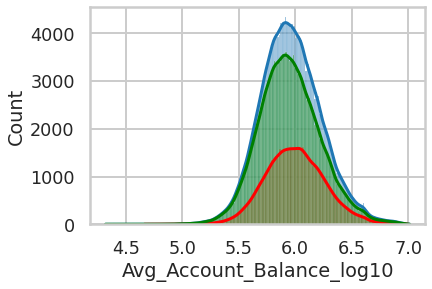

In [ ]:
# Avg_Account_Balance의 분포

#### 상관계수 구하기
df['Avg_Account_Balance_log10'] = np.log10(df['Avg_Account_Balance'])
# 로그를 하면 정규분포 모양으로 나옴 
#실제 평균치는 1,000,000 달러

sns.histplot(df['Avg_Account_Balance_log10'], kde = True);
sns.histplot(df[df['Is_Lead'] == 1]['Avg_Account_Balance_log10'], kde = True, color="red");
sns.histplot(df[df['Is_Lead'] == 0]['Avg_Account_Balance_log10'], kde = True, color="green");
#사실상 계좌 잔고하고는 별로 상관이 없이 보임 

In [ ]:
# Avg_Account_Balance의 평균값
df['Avg_Account_Balance'].mean()
# 여기 밑에 값이 의미하는게 지금 log10을 적용한거니까
# 실제 값음 10^5.964348188878551 이라는 뜻

1128401.8569492602

In [ ]:
# Avg_Account_Balance의 평균값보다 낮은 고객은 목표 고객일 가능성이 조금 더 높음.
low_balance = df[(df['Avg_Account_Balance'] < 1128401) & (df['Is_Lead'] == 1)]
low_balance

가설5. 3개월 이내 은행 서비스를 이용한 고객(Is_Active)이 카드를 발급받을 가능성이 높다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


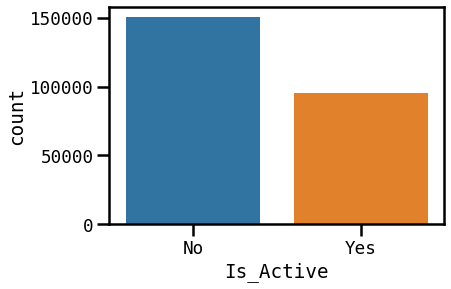

In [ ]:
# Is_Active의 분포


sns.countplot(df['Is_Active']);

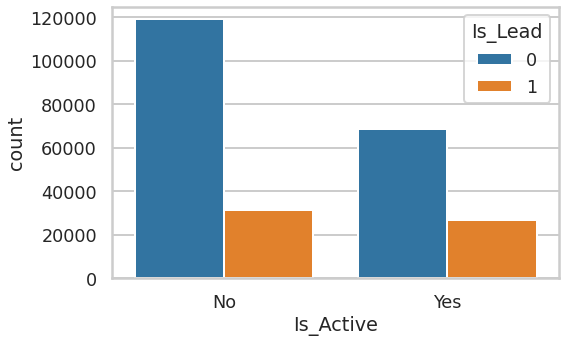

In [ ]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Is_Active', hue='Is_Lead', data=df);

In [ ]:
Active_customer = df[(df['Is_Active'] == 'Yes') & (df['Is_Lead'] == 1)]
Active_customer

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1
29,KGLLM5AM,Female,52,RG283,Self_Employed,X3,56,Yes,1056910,Yes,1
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1
37,AGDXY8Y5,Male,59,RG284,Self_Employed,X3,55,Yes,294714,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
245693,NUTSCAQY,Female,52,RG273,Other,X3,74,Yes,1122023,Yes,1
245697,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1


In [ ]:
Active_customer_not_Lead = df[(df['Is_Active'] == 'Yes') & (df['Is_Lead'] == 0)]
Active_customer_not_Lead

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
10,NVC424KZ,Male,53,RG254,Self_Employed,X3,123,No,980664,Yes,0
12,FCPEEIY3,Female,27,RG277,Salaried,X1,20,No,811591,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
245715,EJMPTVQZ,Female,26,RG270,Other,X1,19,No,903608,Yes,0
245716,JVSEPN7L,Male,41,RG282,Self_Employed,X4,14,No,368949,Yes,0
245717,LALZCPEV,Male,42,RG251,Self_Employed,X4,13,No,217266,Yes,0
245718,UMKANGED,Male,40,RG284,Self_Employed,X2,13,No,864937,Yes,0


In [ ]:
InActive_customer = df[(df['Is_Active'] == 'No') & (df['Is_Lead'] == 1)]
InActive_customer

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1
34,FXPTJYP7,Male,67,RG268,Other,X1,87,Yes,1684182,No,1
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1
...,...,...,...,...,...,...,...,...,...,...,...
245683,9VFKEFOS,Male,71,RG283,Other,X3,13,NaN,492873,No,1
245684,WVJFPREY,Female,51,RG281,Entrepreneur,X3,99,NaN,552992,No,1
245690,3HPHK52G,Male,51,RG283,Self_Employed,X1,91,No,766548,No,1
245694,WIZBXYQZ,Female,50,RG277,Self_Employed,X2,92,NaN,1385124,No,1


In [ ]:
InActive_customer_not_Lead = df[(df['Is_Active'] == 'No') & (df['Is_Lead'] == 0)]
InActive_customer_not_Lead

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245719,DQ48DATH,Female,38,RG280,Salaried,X2,13,Yes,354665,No,0
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0




*   3개월 이내 이용하지 않은 고객의 경우 목표 고객일 가능성이 조금 더 높았다.


직업별로 차이가 있는지 확인

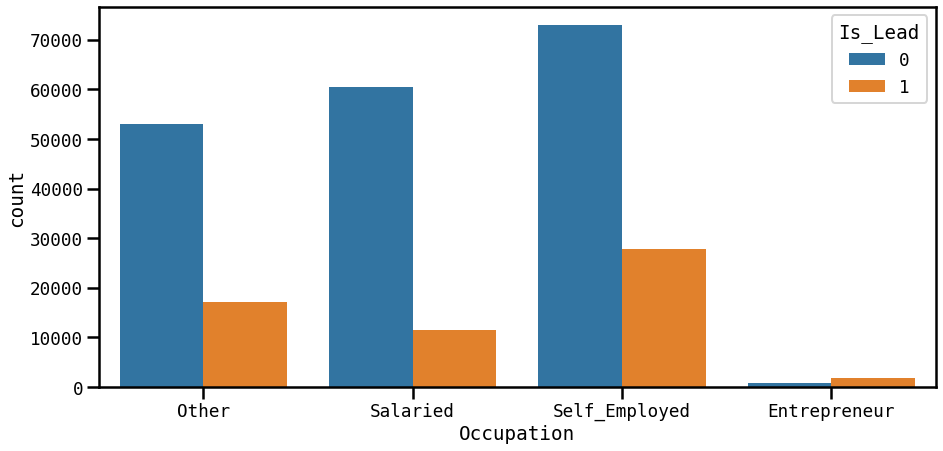

In [ ]:
# 비율 1로 늘려놓고 보면 쉽긴 한데 밑에 분석한대로 Entrepreneur인 고객이 현저히 확률이 높은건 맞음.


plt.subplots(figsize= (15, 7))
sns.countplot(x = 'Occupation', hue='Is_Lead', data=df);

 

*   Entrepreneur(사업가)는 목표 고객 가능성이 높았다.
*   급여를 받는 사람은 목표 고객이 아닐 가능성이 높은 편이다.





---

Feature Engineering

In [ ]:
# 불필요한 ID column 제거
df = df.drop(['ID'], axis = 1)
df

##Train data와 Validation data로 나누기

In [ ]:
target = 'Is_Lead'

features = df.columns.drop([target])

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

train.shape, val.shape, test.shape

###Baseline### 

In [ ]:
# baseline
from sklearn.metrics import accuracy_score

major = y_train.mode()[0]
pred = [major] * len(y_train)
val_pred = [major] * len(y_val)

# target class의 최빈값이 정확도
print("training_accuracy_score: ", accuracy_score(y_train, pred))
print("validation_accuracy_score: ", accuracy_score(y_val, val_pred))

#ML Model Test

## Linear

In [ ]:
# LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor

lr = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(random_state=42)
)

#tt = TransformedTargetRegressor(regressor=lr,func=np.log1p, inverse_func=np.expm1)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print('train accuracy:', lr.score(X_train, y_train))
print('validation accuracy:', lr.score(X_val, y_val))
print('report',classification_report(y_val, y_pred))
print('roc_auc_score: ', roc_auc_score(y_val, y_pred))



*   f1 score를 봤을 때 제대로 작동하지 않았다. 




In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
)

dt.fit(X_train, y_train)
y_pred_01 = dt.predict(X_val)

print('train accuracy:', dt.score(X_train, y_train))
print('validation accuracy:', dt.score(X_val, y_val))
print('report',classification_report(y_val, y_pred_01))
print('roc_auc_score: ', roc_auc_score(y_val, y_pred_01))



*   과적합 발생



In [ ]:
# RandomForestCalssifier
from sklearn.ensemble import RandomForestClassifier

rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

rf.fit(X_train, y_train)
y_pred_02 = rf.predict(X_val)

print('train accuracy:', rf.score(X_train, y_train))
print('validation accuracy:', rf.score(X_val, y_val))
print('report',classification_report(y_val, y_pred_02))
print('roc_auc_score: ', roc_auc_score(y_val, y_pred_02))



*   과적합으로 보여진다.




In [ ]:
# XGBClassifier
from xgboost import XGBClassifier

xg = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_jobs=-1, random_state=42))

xg.fit(X_train, y_train)
y_pred_03 = xg.predict(X_val)

print('train accuracy:', xg.score(X_train, y_train))
print('validation accuracy:', xg.score(X_val, y_val))
print('report',classification_report(y_val, y_pred_03))
print('roc_auc_score: ', roc_auc_score(y_val, y_pred_03))




*   roc_auc_score 성능이 가장 좋은 XGB 하이퍼파라미터 조정 진행.




---

## 하이퍼파라미터 조정

###XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(scale_pos_weight=ratio, random_state=42)
)

dist = {
    'simpleimputer__strategy': ['most_frequent', 'constant'],
    'xgbclassifier__n_estimators' : randint(100,300),
    'xgbclassifier__max_depth' : [3, 5, 7, 10],
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions=dist,
    n_iter=5,
    cv=3,
    scoring ='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

In [ ]:
print('best_params: ', clf.best_params_)

In [ ]:
model = clf.best_estimator_

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('train accuracy:', model.score(X_train, y_train))
print('validation accuracy:', model.score(X_val, y_val))
print('Report:',classification_report(y_val, y_pred_val))
print('roc_auc_score: ', roc_auc_score(y_val, y_pred_val))

#Final TestSet

In [ ]:
y_pred = model.predict(X_test)

print('test accuracy:', model.score(X_test, y_test))
print('Report:',classification_report(y_test, y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))




*   최종 모델은 여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 부스팅 유형인 XGBoostclassifier로 결정했다. 
*   하이퍼파라미터 조정에 의해 점수가 어느정도 개선되었다.



##Feature Importance

In [ ]:
xgb = model.named_steps['xgbclassifier']
importances = pd.Series(xgb.feature_importances_, X_train.columns)

import matplotlib.pyplot as plt
%matplotlib inline 

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('xgb', XGBClassifier(n_estimators=213, random_state=42, n_jobs=-1)) 
])

In [ ]:
pipe.named_steps


In [ ]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xgb'], # model
    scoring='f1', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

In [ ]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [ ]:
# pipeline 다시 정의
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('xgb', RandomForestClassifier(n_estimators=213, random_state=42, n_jobs=-1)) 
], verbose=1)

pipe.fit(X_train_selected, y_train);

In [ ]:
print('검증 정확도: ', pipe.score(X_val_selected, y_val))

#Interpreting ML Model

In [ ]:
encoder = OrdinalEncoder(handle_missing='value')
X_train_encoded = encoder.fit_transform(X_train)

from pdpbox import pdp
feature = 'Age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);



*   40세 이상부터는 영향도가 올라가지만 46세부터 더 많은 나이에서는 영향도가 일정해진다.



In [ ]:
feature = 'Vintage'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);



*   은행 서비스 이용기간(Vintage)가 40이 넘는 고객부터 서서히 영향도가 증가하다가 80에서 고점을 찍는다. 이후 소폭 하향하다가 일정해진다.
